In [10]:
library(nnet)
wholeSet = read.csv("./merged.csv")
str(wholeSet)

'data.frame':	3528 obs. of  6 variables:
 $ iperf    : num  18.4 18.5 18.3 17.5 17.5 ...
 $ sysbench : num  9.02 9.02 9.03 9.46 9.38 ...
 $ ycruncher: num  3.78 3.78 3.77 3.84 3.83 ...
 $ pgbench  : int  40954 40026 39843 40244 39264 39627 74700 74700 74700 40402 ...
 $ setId    : int  1 1 1 2 2 2 2 2 2 3 ...
 $ vmId     : int  1 1 1 1 1 1 2 2 2 1 ...


In [11]:
library(scales)
wholeSet$pgbench <- rescale(wholeSet$pgbench, c(0,1))
wholeSet$sysbench <- rescale(wholeSet$sysbench , c(0,1))
wholeSet$iperf <- rescale(wholeSet$iperf, c(0,1))
wholeSet$ycruncher <- rescale(wholeSet$ycruncher, c(0,1))
str(wholeSet)

'data.frame':	3528 obs. of  6 variables:
 $ iperf    : num  0.996 1 0.989 0.945 0.942 ...
 $ sysbench : num  0.00848 0.01714 0.02719 0.77732 0.62823 ...
 $ ycruncher: num  0.00465 0.00372 0 0.02974 0.02509 ...
 $ pgbench  : num  0.301 0.282 0.278 0.287 0.266 ...
 $ setId    : int  1 1 1 2 2 2 2 2 2 3 ...
 $ vmId     : int  1 1 1 1 1 1 2 2 2 1 ...


In [12]:

# Loading the dplyr package
library(dplyr)
 
# Using sample_frac to create 70 - 30 slipt into test and train
train <- sample_frac(wholeSet, 0.7)
sample_id <- as.numeric(rownames(train)) # rownames() returns character so as.numeric
test <- wholeSet[-sample_id,]

In [14]:
head(train)

,iperf,sysbench,ycruncher,pgbench,setId,vmId
635,0.05250319,0.045714286,0.2500000,0.12833095,21,2
188,0.33580972,0.020259740,0.2481413,0.41969481,11,8
933,0.01979265,0.031341991,0.3029740,0.20748701,25,11
235,0.14342740,0.015411255,0.2365242,0.13452181,13,1
2566,0.04618285,0.033593074,0.9600372,0.06747831,41,36
1630,0.08582358,0.005887446,0.7286245,0.08959149,33,16


In [4]:
#setId needs to be a factor in order to use multinomial logistic regression?
train$setId <- factor(train$setId)
test$setId <- factor(test$setId)
str(train)

'data.frame':	2470 obs. of  6 variables:
 $ iperf    : num  0.0198 0.0833 0.0531 0.0284 0.045 ...
 $ sysbench : num  0.01489 0.00519 0.0142 0.00693 0.04952 ...
 $ ycruncher: num  0.947 0.739 0.543 0.951 0.539 ...
 $ pgbench  : num  0.9184 0.2058 0.0674 0.0468 0.0717 ...
 $ setId    : Factor w/ 47 levels "2","3","4","5",..: 45 33 29 41 33 5 21 36 29 31 ...
 $ vmId     : int  34 27 9 28 29 3 8 14 26 5 ...


In [9]:

# Setting the basline 
#Only works when the you are predicting a factor.
train$setId <- relevel(train$setId, ref = "24")
head(train)

,iperf,sysbench,ycruncher,pgbench,setId,vmId
1500,1.617,9.0258,4.943,31489,32,4
2025,1.182,9.0180,5.647,28527,37,9
2261,1.950,9.0186,4.926,29034,39,13
1315,2.461,9.0176,4.875,31302,30,4
685,2.189,9.0229,4.827,33580,21,19
54,1.498,9.0224,4.224,35907,6,3


In [13]:

# Loading the nnet package
require(nnet)
# Training the multinomial model
multinom.fit <- multinom(setId ~ iperf + ycruncher + sysbench + pgbench, data = train)

# Checking the model
summary(multinom.fit)


# weights:  288 (235 variable)
initial  value 9561.866497 
iter  10 value 7970.325357
iter  20 value 7279.885722
iter  30 value 7083.408766
iter  40 value 6920.862347
iter  50 value 6808.986722
iter  60 value 6711.782410
iter  70 value 6572.318650
iter  80 value 6488.744796
iter  90 value 6440.014555
iter 100 value 6409.911763
final  value 6409.911763 
stopped after 100 iterations


Call:
multinom(formula = setId ~ iperf + ycruncher + sysbench + pgbench, 
    data = train)

Coefficients:
   (Intercept)      iperf   ycruncher     sysbench     pgbench
2   -41.012962   28.68690  70.1414309 102.83214435 -10.5056250
3    20.755128  -10.97875 -79.1851187   0.29105692   6.0666250
4    22.028246  -12.95468 -81.9515204   0.81967513   6.0800713
5    21.173795  -12.39260 -63.6179176 -13.74027763   3.3340138
6    17.325263  -11.72265 -49.0176213  11.78138569   2.4223783
7    16.114345  -12.25341 -42.1394975   7.82650388   3.4679533
8    12.197063  -12.42987 -25.2160265  33.37296215   3.2705985
9    23.048724  -15.56528 -63.9386069  -9.10083721   3.0992233
10   24.540903  -16.55336 -67.3911484 -41.91935336   2.6094267
11   24.874643  -18.27887 -68.7925356   1.24750826   0.8073076
12   24.760105  -19.51838 -71.3492135  11.70391503   4.1182030
13   21.587753  -18.04712 -53.9995712   1.70947538   1.8644016
14   21.361182  -20.05072 -51.5601730  -7.22584901   3.1661046
15   19.525

In [8]:
#predicted_scores <- predict (multinom.fit, test, "probs")
#predicted_scores
levels(train$setId)
head(train)

[1] "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15" "16"
[16] "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30" "31"
[31] "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45" "46"
[46] "47" "48"

,iperf,sysbench,ycruncher,pgbench,setId,vmId
3207,0.01979265,0.014891775,0.9474907,0.91840073,46,34
1764,0.08332871,0.005194805,0.7388476,0.20580988,34,27
1331,0.05311305,0.014199134,0.5427509,0.06737479,30,9
2667,0.02844154,0.006926407,0.9507435,0.04683521,42,28
1769,0.04496313,0.049523810,0.5385688,0.07172288,34,29
52,0.12180518,0.028398268,0.2170074,0.20338737,6,3


In [14]:
# Predicting the values for train dataset
train$predicted <- predict(model=multinom.fit, newdata = train, "class")
 
# Building classification table
ctable <- table(train$setId, train$predicted)
 
# Calculating accuracy - sum of diagonal elements divided by total obs
#round((sum(diag(ctable))/sum(ctable))*100,2)
#Just over 4% accuracy,  no bueno
head(ctable)

ERROR: Error in UseMethod("predict"): no applicable method for 'predict' applied to an object of class "character"


In [29]:
# Predicting the values for train dataset
test$predicted <- predict(multinom.fit, newdata = test, "class")
 
# Building classification table
ctable <- table(test$setId, test$predicted)
 
# Calculating accuracy - sum of diagonal elements divided by total obs
round((sum(diag(ctable))/sum(ctable))*100,2)
#3.12

[1] 7.75

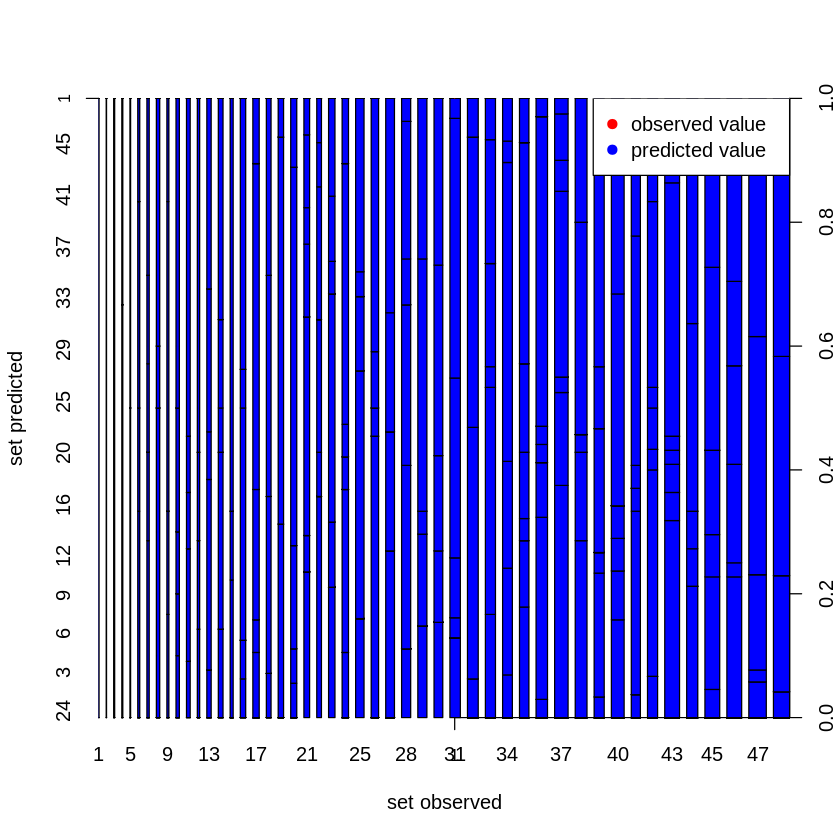

In [24]:
plot(x = test$setId , y = test$predicted,col="blue",pch=19,xlab="set observed",ylab="set predicted")
axis(1,1:16,1:16,cex.axis=0.8)
axis(2,1:16,1:16,cex.axis=0.8)
par(new=TRUE)
lines(x = range(1:16) , y = range(1:16),col="red")
legend("topright",legend=c("observed value","predicted value"),pch=19, col=c("red","blue"))

In [26]:
print("correct prediction")
mean(as.character(predicted_class) == as.character(testingSet$setId))

[1] "correct prediction"


[1] 0.04532578